<a href="https://colab.research.google.com/github/funabashi800/Bandoffset/blob/master/material_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# filter warnings messages from the notebook
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Set pandas view options
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
!pip install matminer

    100% |████████████████████████████████| 4.1MB 1.2MB/s 
    100% |████████████████████████████████| 2.0MB 11.9MB/s 
    100% |████████████████████████████████| 409kB 24.8MB/s 
    100% |████████████████████████████████| 163kB 30.1MB/s 
    100% |████████████████████████████████| 51kB 19.6MB/s 
    100% |████████████████████████████████| 37.3MB 1.1MB/s 
    100% |████████████████████████████████| 665kB 17.7MB/s 
    100% |████████████████████████████████| 61kB 22.3MB/s 
    100% |████████████████████████████████| 31.2MB 1.1MB/s 
    100% |████████████████████████████████| 51kB 17.1MB/s 
    100% |████████████████████████████████| 245kB 21.2MB/s 
    100% |████████████████████████████████| 81kB 27.5MB/s 
    100% |████████████████████████████████| 81kB 22.8MB/s 
    100% |████████████████████████████████| 2.1MB 12.0MB/s 
    100% |████████████████████████████████| 430kB 21.6MB/s 
    100% |████████████████████████████████| 102kB 26.9MB/s 
    100% |████████████████████████████████| 16

In [7]:
from matminer.data_retrieval.retrieve_MP import MPDataRetrieval

api_key = "2vg9wZLez5OM6HFn"  # Set your MP API key here. If set as an environment variable 'MAPI_KEY', set it to 'None'
mpr = MPDataRetrieval(api_key)     # Create an adapter to the MP Database.

# criteria is to get all binary compounds
criteria = {'nelements': 2}

# properties are the materials attributes we want
# See https://github.com/materialsproject/mapidoc for available properties you can specify
properties = ['pretty_formula', 'spacegroup.symbol', 'formation_energy_per_atom', 'band_gap', 'e_above_hull', 
              'density', 'volume', 'nsites']

# get the data!
df_mp = mpr.get_dataframe(criteria=criteria, properties=properties)
print('Number of binary compounds extracted = {}'.format(len(df_mp)))

Number of binary compounds extracted = 13860


In [8]:
df_mp.head()

,pretty_formula,spacegroup.symbol,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites
material_id,,,,,,,,
mp-865950,AcAg3,P6_3/mmc,-0.206854,0.0000,0.0,8.930827,204.751583,8
mp-866199,AcAg,Pm-3m,-0.268366,0.0000,0.0,8.859009,62.767941,2
mp-862617,AcAl3,P6_3/mmc,-0.368426,0.0000,0.0,5.243536,195.041675,8
mp-867838,AcAu3,P6_3/mmc,-0.693050,0.0000,0.0,13.755798,197.466462,8
mp-27972,AcBr3,P6_3/m,-2.103586,4.1045,0.0,5.570195,278.264428,8


In [9]:
df_mp.describe()

,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites
count,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000
mean,-0.626519,0.542294,0.137128,6.352304,344.232222,15.187157
std,0.983194,1.273995,0.292368,3.644392,598.482160,20.967174
min,-4.522664,0.000000,0.000000,0.039075,11.917209,2.000000
25%,-0.933751,0.000000,0.000000,3.512019,85.094120,4.000000
50%,-0.342153,0.000000,0.020931,5.777660,172.074033,8.000000
75%,-0.027556,0.141350,0.161630,8.329129,356.596646,16.000000
max,4.389405,9.061200,4.389405,21.676369,14531.250287,200.000000


In [10]:
df_mp = df_mp[df_mp['e_above_hull'] < 0.1]
df_mp.describe()

,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites
count,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000,9466.000000
mean,-0.789770,0.656388,0.016517,6.735374,353.815080,16.202197
std,0.924913,1.393007,0.026054,3.544205,529.972765,22.339041
min,-4.522664,0.000000,0.000000,0.222775,11.917209,2.000000
25%,-1.020084,0.000000,0.000000,4.066123,92.376327,4.000000
50%,-0.448040,0.000000,0.000469,6.309683,175.963398,8.000000
75%,-0.169640,0.515575,0.023895,8.631621,373.343771,17.000000
max,0.099969,9.061200,0.099988,21.676369,6897.599713,196.000000


In [11]:
# add volume per atom descriptor
df_mp['vpa'] = df_mp['volume']/df_mp['nsites']

# explore columns
df_mp.head()

,pretty_formula,spacegroup.symbol,formation_energy_per_atom,band_gap,e_above_hull,density,volume,nsites,vpa
material_id,,,,,,,,,
mp-865950,AcAg3,P6_3/mmc,-0.206854,0.0000,0.0,8.930827,204.751583,8,25.593948
mp-866199,AcAg,Pm-3m,-0.268366,0.0000,0.0,8.859009,62.767941,2,31.383970
mp-862617,AcAl3,P6_3/mmc,-0.368426,0.0000,0.0,5.243536,195.041675,8,24.380209
mp-867838,AcAu3,P6_3/mmc,-0.693050,0.0000,0.0,13.755798,197.466462,8,24.683308
mp-27972,AcBr3,P6_3/m,-2.103586,4.1045,0.0,5.570195,278.264428,8,34.783053


In [12]:
!pip install pymatgen

In [13]:
# target output column
y = df_mp['band_gap'].values

# possible descriptor columns
X_cols = [c for c in df_mp.columns 
          if c not in ['band_gap', 'pretty_formula', 
                       'volume', 'nsites', 'spacegroup.symbol', 'e_above_hull']]
X = df_mp.as_matrix(X_cols)

print("Possible descriptors are: {}".format(X_cols))

Possible descriptors are: ['formation_energy_per_atom', 'density', 'vpa']


In [14]:
!pip install sklearn

  Running setup.py bdist_wheel for sklearn ... - done
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()

linear_regression.fit(X, y)

# get fit statistics
print ('R2 = ' + str(round(linear_regression.score(X, y), 3)))
print ('RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=linear_regression.predict(X))))

R2 = 0.463
RMSE = 1.020


In [17]:
from sklearn.ensemble import RandomForestRegressor

RF_rg = RandomForestRegressor(n_estimators=50, random_state=1)

RF_rg.fit(X, y)
print ('R2 = ' + str(round(RF_rg.score(X, y), 3)))
print ('RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=RF_rg.predict(X))))

R2 = 0.975
RMSE = 0.221


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

line1: [<matplotlib.lines.Line2D object at 0x7fd203296198>]
line2: [<matplotlib.lines.Line2D object at 0x7fd20326fb38>]


Text(0.5,1,'Random forest regression')

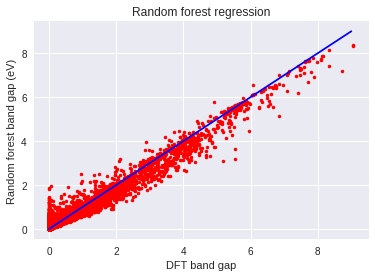

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line1 = ax.plot(y, RF_rg.predict(X), "r.")
line2 = ax.plot([0,1,2,3,4,5,6,7,8,9], "b")
print('line1:', line1)
print('line2:', line2)
ax.set_xlabel('DFT band gap')
ax.set_ylabel('Random forest band gap (eV)')
ax.set_title('Random forest regression')

In [27]:
from sklearn.cross_validation import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)
crossvalidation = KFold(n=X.shape[0], n_folds=10, shuffle=True, random_state=1)

# compute cross validation scores for random forest model
scores = cross_val_score(linear_regression, X, y, scoring='neg_mean_squared_error', 
                         cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]

print ('Cross-validation results:')
print ('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean RMSE: 1.020


In [28]:
# compute cross validation scores for random forest model
scores = cross_val_score(RF_rg, X, y, scoring='neg_mean_squared_error', 
                         cv=crossvalidation, n_jobs=1)

rmse_scores = [np.sqrt(abs(s)) for s in scores]

print ('Cross-validation results:')
print ('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean RMSE: 0.592


In [0]:
importances = RF_rg.feature_importances_
indices = np.argsort(importances)[::-1]